In [1]:
import seaborn as sns
import pandas as pd
from constants import *
import pylab
import pingouin as pg
from scipy.stats import mannwhitneyu

In [2]:
IDEOTYPES = {'T' : 'Telephone',
             'dT' : 'Droopy Telephone', 'DT' : 'Droopy Telephone',
             'C' : 'Christmas Tree', 'CT' : 'Christmas Tree',
             'B' : 'Broomstick'}
CONDITIONS = {'S' : 'Salt', 'C': 'Control'}

In [3]:
pareto_front_df = pd.read_csv('%s/arbor_stats.csv' % STATISTICS_DIR, skipinitialspace=True)
pareto_front_df

,arbor name,pareto front distance,pareto front location
0,087_1_C_day4,2.023706,1.00
1,084_2_C_day2,0.213441,1.00
2,043_5_S_day5,0.029891,0.88
3,093_1_C_day2,0.447800,1.00
4,078_1_C_day4,0.161652,0.61
...,...,...,...
7255,m248_1_C_noacc_day9,10.661093,0.11
7256,la1511_2_C_1acc_day9,1.791949,0.56
7257,m058_4_S_1acc_day9,4.505879,0.24
7258,m248_4_C_1acc_day9,7.464992,0.31


In [4]:
scaling_df = pd.read_csv('%s/scaling_distances.csv' % STATISTICS_DIR, skipinitialspace=True)
pareto_front_df = pd.merge(pareto_front_df, scaling_df)
pareto_front_df

,arbor name,pareto front distance,pareto front location,pareto front scaling distance,pareto front scaling location
0,087_1_C_day4,2.023706,1.00,1.072667,0.83
1,084_2_C_day2,0.213441,1.00,1.036260,0.95
2,043_5_S_day5,0.029891,0.88,1.004686,0.88
3,093_1_C_day2,0.447800,1.00,1.057325,0.70
4,078_1_C_day4,0.161652,0.61,1.024057,0.61
...,...,...,...,...,...
7167,m248_1_C_noacc_day9,10.661093,0.11,1.145030,0.22
7168,la1511_2_C_1acc_day9,1.791949,0.56,1.099756,0.46
7169,m058_4_S_1acc_day9,4.505879,0.24,1.083096,0.24
7170,m248_4_C_1acc_day9,7.464992,0.31,1.120268,0.38


In [5]:
dist_column = 'pareto front scaling distance'
loc_column = 'pareto front location'

In [6]:
metadata_df = pd.read_csv('%s/metadata.csv' % METADATA_DIR, skipinitialspace=True)
metadata_df['condition'] = metadata_df['condition'].map(CONDITIONS)
metadata_df['genotype'].unique()

array(['103', '031', '055', '098', '101', '059', '034', '030', '002',
       '001', '076', '102', '104', '080', '005', '081', '096', '028',
       '058', '009', '038', '079', '040', '035', '094', '074', '010',
       '032', '022', '003', '105', '056', '095', '011', '106', '075',
       '012', '033', '097', '013', '006', '007', '057', '008', '099',
       '029', '078', '037', '036', '292', '212', '307', '282', '199',
       '278', '301', '287', '213', '214', '286', '194', '285', '284',
       '196', '201', '279', '293', '280', '299', '207', '298', '200',
       '211', '308', '283', '306', '220', '290', '198', '195', '289',
       '300', '288', '291', '277', '197', '189', '294', '235', '230',
       '234', '173', '084', '240', '236', '241', '231', '176', '064',
       '228', '244', '237', '174', '274', '249', '247', '091', '227',
       '250', '093', '229', '271', '239', '221', '233', '225', '245',
       '273', '248', '089', '085', '259', '175', '087', '086', '092',
       '222', '090',

In [7]:
ideotypes_df = pd.read_csv('%s/manual_scoring_last_day.csv' % SCORING_DATA_DIR, skipinitialspace=True)
ideotypes_df['ideotype (T/C/B)'] = ideotypes_df['ideotype (T/C/B)'].replace('CT', 'C')
ideotypes_df['ideotype (T/C/B)'] = ideotypes_df['ideotype (T/C/B)'].replace('DT', 'dT')
ideotypes_df['ideotype'] = ideotypes_df['ideotype (T/C/B)'].map(IDEOTYPES)
ideotypes_df['condition'] = ideotypes_df['condition'].map(CONDITIONS)

In [8]:
ideotypes_df.dropna(subset=['ideotype'], inplace=True)
#ideotypes_df = ideotypes_df.astype({'genotype' : 'str'})
ideotypes_df['genotype'].unique()

array([  1,   2,   3,   5,   6,   8,   9,  10,  11,  12,  13,  14,  15,
        17,  19,  20,  21,  22,  23,  24,  27,  28,  29,  30,  31,  33,
        34,  35,  36,  37,  38,  40,  42,  43,  44,  45,  46,  48,  49,
        50,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  69,  70,  72,  73,  74,  75,  76,  78,  79,
        80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  98,  99, 101, 102, 103, 104, 105, 106, 107,
       108, 109, 111, 112, 113, 115, 116, 117, 118, 119, 120, 121, 125,
       126, 127, 128, 129, 130, 131, 132, 133, 135, 136, 138, 139, 140,
       141, 142, 143, 144, 146, 147, 149, 150, 151, 153, 154, 155, 156,
       157, 158, 159, 160, 162, 165, 166, 167, 168, 169, 170, 171, 172,
       173, 174, 175, 176, 178, 179, 181, 182, 183, 184, 185, 186, 187,
       188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200,
       201, 207, 211, 212, 213, 214, 220, 221, 222, 225, 227, 22

In [9]:
arbor_stats_df = pd.merge(pareto_front_df, metadata_df)
arbor_stats_df

,arbor name,pareto front distance,pareto front location,pareto front scaling distance,pareto front scaling location,experiment,day,Picture #,genotype,replicate,condition,hormone
0,087_1_C_day4,2.023706,1.00,1.072667,0.83,PimpiBig3,4,268,087,1,Control,NaN
1,084_2_C_day2,0.213441,1.00,1.036260,0.95,PimpiBig3,2,203,084,2,Control,NaN
2,043_5_S_day5,0.029891,0.88,1.004686,0.88,PimpiBig6,5,24,043,5,Salt,NaN
3,093_1_C_day2,0.447800,1.00,1.057325,0.70,PimpiBig3,2,35,093,1,Control,NaN
4,078_1_C_day4,0.161652,0.61,1.024057,0.61,PimpiBig4,4,267,078,1,Control,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
7871,m248_1_C_noacc_day9,10.661093,0.11,1.145030,0.22,PimpiACC,9,89,m248,1,Control,noacc
7872,la1511_2_C_1acc_day9,1.791949,0.56,1.099756,0.46,PimpiACC,9,136,la1511,2,Control,1acc
7873,m058_4_S_1acc_day9,4.505879,0.24,1.083096,0.24,PimpiACC,9,128,m058,4,Salt,1acc
7874,m248_4_C_1acc_day9,7.464992,0.31,1.120268,0.38,PimpiACC,9,145,m248,4,Control,1acc


In [10]:
last_day_arbors = arbor_stats_df.sort_values('day', ascending=False)
last_day_arbors = last_day_arbors.drop_duplicates(['experiment', 'genotype', 'replicate', 'condition'])
last_day_arbors

,arbor name,pareto front distance,pareto front location,pareto front scaling distance,pareto front scaling location,experiment,day,Picture #,genotype,replicate,condition,hormone
7875,M058_8_S_5acc_day9,1.911846,1.00,1.186147,0.40,PimpiACC,9,25,M058,8,Salt,5acc
7329,LA1511_5_C_locyto_day9,0.786090,0.26,1.092019,0.38,PimpiCyto,9,25,LA1511,5,Control,locyto
7340,M248_4_S_nocyto_day9,3.947307,0.35,1.097310,0.39,PimpiCyto,9,113,M248,4,Salt,nocyto
7339,LA1511_1_C_hicyto_day9,0.693741,1.00,1.223035,1.00,PimpiCyto,9,11,LA1511,1,Control,hicyto
7338,M248_4_C_hicyto_day9,0.807371,1.00,1.149372,0.79,PimpiCyto,9,71,M248,4,Control,hicyto
...,...,...,...,...,...,...,...,...,...,...,...,...
2108,125_4_s_day2,0.099945,0.43,1.029435,0.60,PimpiBig5,2,50,125,4,NaN,NaN
2236,155_2_c_day2,0.154041,0.17,1.027116,0.18,PimpiBig5,2,54,155,2,NaN,NaN
5353,155_1_c_day2,0.421219,0.85,1.055323,0.75,PimpiBig5,2,51,155,1,NaN,NaN
2754,230_3_S_day1,0.021110,1.00,1.027552,1.00,PimpiBig3,1,93,230,3,Salt,NaN


In [11]:
ideotypes_df['genotype'] = ideotypes_df['genotype'].astype(str)
last_day_arbors['genotype'] = last_day_arbors['genotype'].astype(str)

In [12]:
last_day_arbors.dtypes

arbor name                        object
pareto front distance            float64
pareto front location            float64
pareto front scaling distance    float64
pareto front scaling location    float64
experiment                        object
day                                int64
Picture #                          int64
genotype                          object
replicate                          int64
condition                         object
hormone                           object
dtype: object

In [13]:
ideotypes_df.dtypes

experiment          object
Picture #            int64
genotype            object
condition           object
ideotype (T/C/B)    object
size (L/M/S)        object
Sodium gap?         object
comments extra      object
ideotype            object
dtype: object

In [14]:
last_day_arbors['genotype'].unique()

array(['M058', 'LA1511', 'M248', '248', '058', '1511', 'LA511', 'm058',
       'la1511', 'm248', '143', '101', '055', '229', '228', '174', '024',
       '052', '099', '294', '007', '144', '045', '042', '230', '002',
       '098', '279', '286', '198', '010', '015', '251', '291', '040',
       '283', '009', '033', '170', '066', '106', '053', '080', '061',
       '017', '050', '172', '244', '165', '288', '012', '005', '104',
       '269', '146', '048', '300', '282', '095', '064', '307', '036',
       '057', '092', '175', '103', '141', '059', '038', '089', '074',
       '021', '211', '063', '173', '031', '227', '272', '034', '067',
       '076', '032', '023', '090', '213', '073', '258', '241', '176',
       '214', '142', '293', '239', '284', '035', '001', '054', '298',
       '102', '260', '197', '168', '027', '072', '301', '046', '234',
       '261', '278', '287', '255', '253', '200', '306', '308', '171',
       '008', '236', '221', '274', '292', '087', '020', '079', '091',
       '086', 

In [15]:
ideotypes_df['genotype'].unique()

array(['1', '2', '3', '5', '6', '8', '9', '10', '11', '12', '13', '14',
       '15', '17', '19', '20', '21', '22', '23', '24', '27', '28', '29',
       '30', '31', '33', '34', '35', '36', '37', '38', '40', '42', '43',
       '44', '45', '46', '48', '49', '50', '52', '53', '54', '55', '56',
       '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67',
       '69', '70', '72', '73', '74', '75', '76', '78', '79', '80', '81',
       '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92',
       '93', '94', '95', '96', '98', '99', '101', '102', '103', '104',
       '105', '106', '107', '108', '109', '111', '112', '113', '115',
       '116', '117', '118', '119', '120', '121', '125', '126', '127',
       '128', '129', '130', '131', '132', '133', '135', '136', '138',
       '139', '140', '141', '142', '143', '144', '146', '147', '149',
       '150', '151', '153', '154', '155', '156', '157', '158', '159',
       '160', '162', '165', '166', '167', '168', '169', '170', '171',

In [16]:
arbor_ideotypes = pd.merge(last_day_arbors, ideotypes_df)
arbor_ideotypes

,arbor name,pareto front distance,pareto front location,pareto front scaling distance,pareto front scaling location,experiment,day,Picture #,genotype,replicate,condition,hormone,ideotype (T/C/B),size (L/M/S),Sodium gap?,comments extra,ideotype
0,143_1_S_day5,0.154844,0.73,1.016782,0.71,PimpiBig2,5,231,143,1,Salt,NaN,dT,M,N,NaN,Droopy Telephone
1,229_2_S_day5,1.843002,0.40,1.056181,0.38,PimpiBig3,5,267,229,2,Salt,NaN,dT,M,D,NaN,Droopy Telephone
2,228_4_S_day5,0.110650,0.25,1.009087,0.26,PimpiBig3,5,94,228,4,Salt,NaN,C,S,D,NaN,Christmas Tree
3,174_4_C_day5,3.668677,0.71,1.036700,0.60,PimpiBig3,5,269,174,4,Control,NaN,T,M,NaN,NaN,Telephone
4,294_1_S_day5,1.030490,0.12,1.037196,0.16,PimpiBig1,5,55,294,1,Salt,NaN,C,M,Y,NaN,Christmas Tree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
934,284_2_S_day3,0.861727,0.28,1.092508,0.53,PimpiBig1,3,104,284,2,Salt,NaN,C,M,D,infected,Christmas Tree
935,286_2_S_day3,0.030175,0.20,1.009851,0.22,PimpiBig1,3,100,286,2,Salt,NaN,C,S,Y,infected,Christmas Tree
936,284_1_S_day3,0.730972,0.67,1.054581,0.62,PimpiBig1,3,160,284,1,Salt,NaN,B,L,Y,infected,Broomstick
937,195_3_C_day3,0.859155,0.31,1.085516,0.44,PimpiBig1,3,120,195,3,Control,NaN,T,M,NaN,infected,Telephone


In [17]:
sns.set()

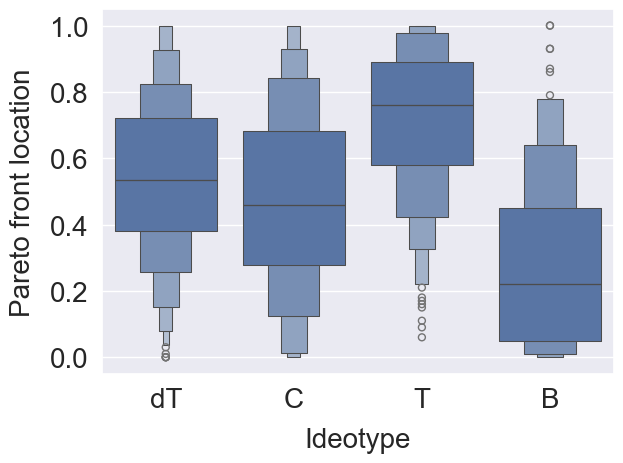

In [18]:
#pylab.figure(figsize=(12.8, 4.8))
sns.boxenplot(x='ideotype (T/C/B)', y=loc_column, data=arbor_ideotypes)
pylab.xlabel('Ideotype', fontsize=20, labelpad=10)
pylab.ylabel('Pareto front location', fontsize=20, labelpad=10)
pylab.xticks(fontsize=20)
pylab.yticks(fontsize=20)
pylab.tight_layout()
pylab.savefig('%s/alpha_distribution_ideotype.pdf' % LOCATION_ANALYSIS_PLOTS_DIR,
              format='pdf')

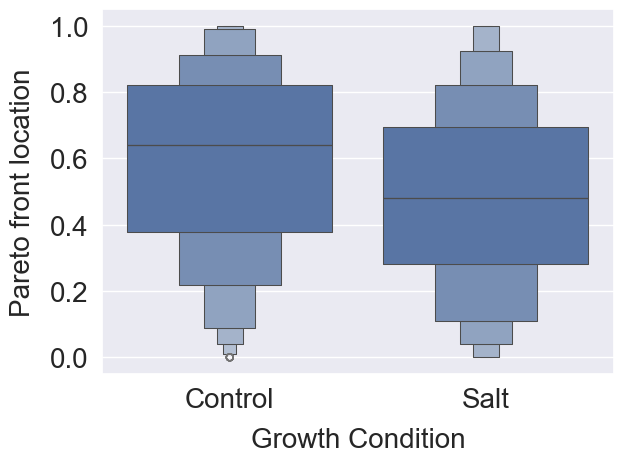

In [19]:
#pylab.figure(figsize=(6.4, 4.8))
sns.boxenplot(x='condition', y=loc_column, data=arbor_ideotypes, order=['Control', 'Salt'])
pylab.xlabel('Growth Condition', fontsize=20, labelpad=10)
pylab.ylabel('Pareto front location', fontsize=20, labelpad=10)
pylab.xticks(fontsize=20)
pylab.yticks(fontsize=20)
pylab.tight_layout()
pylab.savefig('%s/alpha_distribution_condition.pdf' % LOCATION_ANALYSIS_PLOTS_DIR,
              format='pdf')

In [20]:
control_alpha = arbor_ideotypes[arbor_ideotypes['condition'] == 'Control'][loc_column]
salt_alpha = arbor_ideotypes[arbor_ideotypes['condition'] == 'Salt'][loc_column]
print(control_alpha.mean(), "+/", control_alpha.std(ddof=1))
print(salt_alpha.mean(), "+/", salt_alpha.std(ddof=1))
print(mannwhitneyu(control_alpha, salt_alpha))

0.5889583333333335 +/ 0.28304591115550676
0.4875816993464053 +/ 0.27425570450721337
MannwhitneyuResult(statistic=133520.5, pvalue=1.8669373896803683e-08)


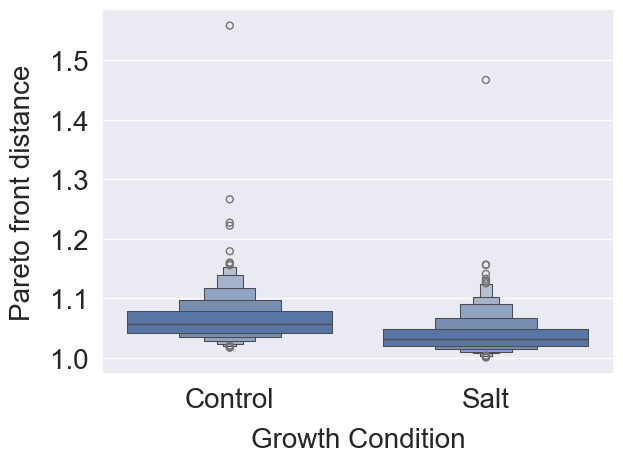

In [21]:
#pylab.figure(figsize=(6.4, 4.8))
sns.boxenplot(x='condition', y=dist_column, data=arbor_ideotypes, order=['Control', 'Salt'])
pylab.xlabel('Growth Condition', fontsize=20, labelpad=10)
pylab.ylabel('Pareto front distance', fontsize=20, labelpad=10)
pylab.xticks(fontsize=20)
pylab.yticks(fontsize=20)
pylab.tight_layout()
pylab.savefig('%s/dist_distribution_condition.pdf' % LOCATION_ANALYSIS_PLOTS_DIR,
              format='pdf')

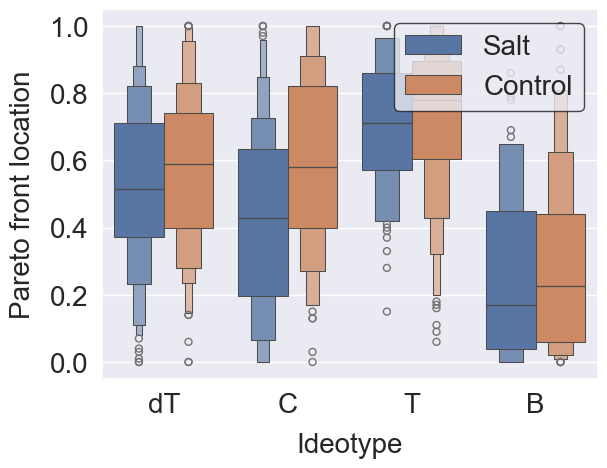

In [22]:
#pylab.figure(figsize=(15, 4.8))
sns.boxenplot(x='ideotype (T/C/B)', y=loc_column, hue='condition', data=arbor_ideotypes)
pylab.xlabel('Ideotype', fontsize=20, labelpad=10)
pylab.ylabel('Pareto front location', fontsize=20, labelpad=10)
pylab.xticks(fontsize=20)
pylab.yticks(fontsize=20)
pylab.legend(frameon=True, fontsize=20, edgecolor='k', loc='upper right')
pylab.show()

In [22]:
# we need to rename this column with a one word name to play nice with pingouin's N-way ANOVA
arbor_ideotypes['alpha'] = arbor_ideotypes[loc_column]
pg.anova(data=arbor_ideotypes, dv='alpha', between=['ideotype', 'condition'])

,Source,SS,DF,MS,F,p-unc,np2
0,ideotype,21.334607,3.0,7.111536,115.195132,1.530228e-66,0.200970
1,condition,2.520918,1.0,2.520918,40.834716,2.263244e-10,0.028862
2,ideotype * condition,0.705204,3.0,0.235068,3.807715,9.838654e-03,0.008245
3,Residual,84.823462,1374.0,0.061735,NaN,NaN,NaN


In [23]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [24]:
arbor_ideotypes = arbor_ideotypes.astype({'genotype' : 'int'})

In [25]:
md = smf.mixedlm("alpha ~ ideotype*condition + (1|genotype)",
                 data=arbor_ideotypes,
                 groups=arbor_ideotypes['genotype'])

In [26]:
mdf = md.fit()

In [27]:
print(mdf.summary())

                          Mixed Linear Model Regression Results
Model:                         MixedLM            Dependent Variable:            alpha   
No. Observations:              1382               Method:                        REML    
No. Groups:                    239                Scale:                         0.0512  
Min. group size:               1                  Log-Likelihood:                -28.6381
Max. group size:               10                 Converged:                     Yes     
Mean group size:               5.8                                                       
-----------------------------------------------------------------------------------------
                                               Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------------------------------
Intercept                                       0.338    0.029 11.813 0.000  0.282  0.394
ideotype[T.Christmas Tree]          

In [28]:
pg.normality(data=arbor_ideotypes, dv='alpha', group='ideotype')

,W,pval,normal
Droopy Telephone,0.985400,4.910990e-05,False
Telephone,0.928427,2.475459e-11,False
Broomstick,0.883231,8.783486e-11,False
Christmas Tree,0.969186,6.508296e-07,False


In [29]:
pg.kruskal(data=arbor_ideotypes, dv='alpha', between='ideotype')

,Source,ddof1,H,p-unc
Kruskal,ideotype,3,275.91768,1.618573e-59


In [30]:
import scikit_posthocs as sp

In [31]:
sp.posthoc_mannwhitney(arbor_ideotypes, val_col='alpha', group_col='ideotype')

,Broomstick,Christmas Tree,Droopy Telephone,Telephone
Broomstick,1.000000e+00,2.221605e-15,2.864102e-29,6.596046e-45
Christmas Tree,2.221605e-15,1.000000e+00,6.607707e-04,3.462047e-26
Droopy Telephone,2.864102e-29,6.607707e-04,1.000000e+00,2.236355e-21
Telephone,6.596046e-45,3.462047e-26,2.236355e-21,1.000000e+00


In [32]:
sp.posthoc_mannwhitney(arbor_ideotypes, val_col='alpha', group_col='condition')

,Control,Salt
Control,1.000000e+00,1.715567e-13
Salt,1.715567e-13,1.000000e+00


In [33]:
arbor_ideotypes[['ideotype', 'alpha']].groupby('ideotype').agg(['mean', 'std'])

alpha          
                      mean       std
ideotype                            
Broomstick        0.274022  0.265849
Christmas Tree    0.479250  0.279859
Droopy Telephone  0.544427  0.241445
Telephone         0.705604  0.230006

In [34]:
arbor_ideotypes[['condition', 'alpha']].groupby('condition').agg(['mean', 'std'])

alpha          
               mean       std
condition                    
Control    0.583452  0.279828
Salt       0.472699  0.276654

<AxesSubplot:xlabel='condition', ylabel='count'>

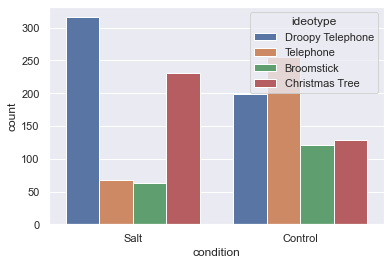

In [35]:
sns.countplot(x='condition', hue='ideotype', data=arbor_ideotypes)

In [36]:
arbor_ideotypes['alpha']

0       0.70
1       0.67
2       0.35
3       0.25
4       0.73
        ... 
1377    0.28
1378    0.25
1379    0.67
1380    0.31
1381    1.00
Name: alpha, Length: 1382, dtype: float64

<AxesSubplot:xlabel='alpha'>

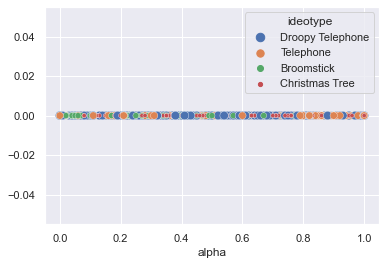

In [37]:
sns.scatterplot(x='alpha', y=0, hue='ideotype', size='ideotype', data=arbor_ideotypes)

In [38]:
import sklearn